## **Credit Card Defaulters Prediction using keras in python**

In [1]:
!pip install tensorflow                  

     |████████████████████████████████| 462 kB 4.3 MB/s 


In [2]:
!pip install keras

In [3]:
import tensorflow as tf

In [4]:
tf.__version__                    #checking tensorflow version

'2.8.0'

In [6]:
import os                         #installing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [9]:
TW_data = pd.read_csv('/content/creditcarddefault.csv')       #importing the dataset
TW_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
TW_data.head()              

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
TW_data.shape

(30000, 25)

In [12]:
TW_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [15]:
#Dropping the id column and saving dependent variables in x and independent in y

x= TW_data.iloc[:,1:24].values     #iloc is location of a particular column, all rows and from column 1-23
y = TW_data.iloc[:,24].values      #all rows and 24th column
print(x)
print(y)

[[ 20000      2      2 ...      0      0      0]
 [120000      2      2 ...   1000      0   2000]
 [ 90000      2      2 ...   1000   1000   5000]
 ...
 [ 30000      1      2 ...   4200   2000   3100]
 [ 80000      1      3 ...   1926  52964   1804]
 [ 50000      1      2 ...   1000   1000   1000]]
[1 1 0 ... 1 1 1]


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 111)   #random state helps in running this model in another pc
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(21000, 23)
(21000,)
(9000, 23)
(9000,)


In [17]:
#scaling the data using preprocessing library
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train= sc.fit_transform(x_train)   #fit calculates the parameters
x_test= sc.transform(x_test)

In [18]:
x_train[:1]

array([[ 0.48238852,  0.81447304,  0.18907673,  0.86211952, -0.48921975,
        -0.87463676, -0.72347864, -0.6983838 , -0.66637051,  0.23416564,
         0.25233359, -0.63042993, -0.63367788, -0.6645842 , -0.51248219,
        -0.57038965,  0.39521137, -0.0821721 , -0.22758026,  0.33473587,
        -0.28260403,  3.38918769, -0.15149706]])

**`MODEL BUILDING USING KERAS`**

In [22]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
class_model_keras = Sequential()

#Adding 3 hidden layers

class_model_keras.add(Dense(24,input_dim=23, activation = 'relu'))
class_model_keras.add(Dense(12,activation = 'relu'))        #2nd layer
class_model_keras.add(Dense(1,activation = 'sigmoid'))      #output layer

In [25]:
class_model_keras.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                576       
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 889
Trainable params: 889
Non-trainable params: 0
_________________________________________________________________


In [40]:
class_model_keras.compile(optimizer='adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [41]:
class_model_keras.fit(x_train, y_train, batch_size = 10, epochs = 100)    #training the model 

Epoch 1/100
2100/2100 [==============================] - 5s 2ms/step - loss: 0.4767 - accuracy: 0.8002
Epoch 2/100
2100/2100 [==============================] - 4s 2ms/step - loss: 0.4438 - accuracy: 0.8160
Epoch 3/100
2100/2100 [==============================] - 4s 2ms/step - loss: 0.4369 - accuracy: 0.8181
Epoch 4/100
2100/2100 [==============================] - 4s 2ms/step - loss: 0.4329 - accuracy: 0.8196
Epoch 5/100
2100/2100 [==============================] - 4s 2ms/step - loss: 0.4314 - accuracy: 0.8206
Epoch 6/100
2100/2100 [==============================] - 7s 3ms/step - loss: 0.4299 - accuracy: 0.8215
Epoch 7/100
2100/2100 [==============================] - 7s 3ms/step - loss: 0.4280 - accuracy: 0.8207
Epoch 8/100
2100/2100 [==============================] - 7s 3ms/step - loss: 0.4262 - accuracy: 0.8221
Epoch 9/100
2100/2100 [==============================] - 4s 2ms/step - loss: 0.4257 - accuracy: 0.8224
Epoch 10/100
2100/2100 [==============================] - 4s 2ms/step - l

In [44]:
y_pred = class_model_keras.predict(x_test)        #predicting the results for test data

In [48]:
import numpy as np
y_pred = np.argmax(y_pred,axis=1)

In [49]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
pred = (y_pred>0.5)

In [51]:
pred

array([False, False, False, ..., False, False, False])

In [52]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, pred)
cf_matrix

array([[6980,    0],
       [2020,    0]])

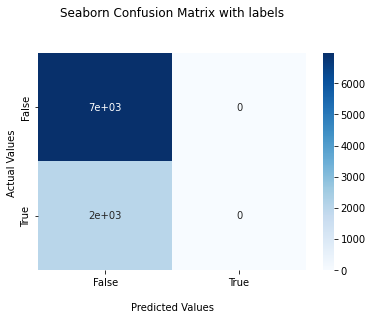

In [54]:
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [56]:
scores = class_model_keras.evaluate(x_test , y_test)
print("\nACCURACY: %.2f%%" % (scores[1]*100))

282/282 [==============================] - 1s 3ms/step - loss: 0.4580 - accuracy: 0.8127

ACCURACY: 81.27%


The model made with keras is 81.27% accurate.